# Group 2 - OLC Final Project - Implementing CRISP-DM method 

<div align="center">
    <img src="https://media.licdn.com/dms/image/D5612AQEvsJOKlLbNoA/article-cover_image-shrink_720_1280/0/1705576758053?e=2147483647&v=beta&t=bMbb05oGHQu-w8v2e_d4D7n5JAx_UDAUKp9ryuk56yo" width="650" height="450"/>
 </div>


# 1. Business Understanding
OmahTi owns a company called "TiProduction." The Director of TiProduction is conducting research to identify the key factors that influence calorie intake and expenditure in humans. The findings from this research will be used to develop innovative products that help people manage their calorie levels effectively after exercising.

<div align="center">
    <img src="https://static.vecteezy.com/system/resources/previews/047/094/716/non_2x/modern-wellbeing-practice-healthy-and-active-lifestyle-or-daily-routine-vector.jpg" width="300" height="200"/>
 </div>

Calories Dataset :
* 'user_id' - data collected from 15,000 different individuals
* 'Gender' - gender
* 'Age' - age
* 'Height' - height
* 'Weight' - weight
* 'Duration' - duration of exercise
* 'Heart_Rate' - heart rate
* 'Body_Temp' - body temperature
* 'Calories' - calories burned

# 2. Data Understanding

<div align="center">
    <img src="https://www.scribbledata.io/wp-content/uploads/2023/01/BLOG-POST-data-life-cycle-01-01-01-02.jpg" width="650" height="450"/>
 </div>
 
The data we obtained is about how a certain persons features affect calories burned after a certain period of exercise

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data_train = pd.read_csv('C:\\Users\\Yusuf Imantaka\\Documents\\OLC Dtaa\\Train.csv')
data_test = pd.read_csv('C:\\Users\\Yusuf Imantaka\\Documents\\OLC Dtaa\\Test.csv')

In [3]:
# Check the data head
data_train.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,16255880,female,46,187.0,82.0,24.0,98.0,40.7,127.0
1,13075573,male,21,181.0,85.0,4.0,77.0,39.0,5.0
2,15653313,male,53,194.0,97.0,19.0,105.0,40.3,139.0
3,10286803,male,61,199.0,114.0,2.0,83.0,38.2,9.0
4,19983656,female,31,170.0,67.0,29.0,111.0,41.1,192.0


In [4]:
# Check the data types
data_train.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [5]:
# Check the data shape
data_train.shape

(9000, 9)

In [6]:
# Check for duplicates
data_train.duplicated().sum()

np.int64(0)

In [7]:
# Check for missing values
data_train.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
# Drop columns that are not useful for the model, we feel like the User_ID isn't significant for determining calories burned
data_train.drop(columns=["User_ID"], inplace = True)

In [9]:
data_train.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,female,46,187.0,82.0,24.0,98.0,40.7,127.0
1,male,21,181.0,85.0,4.0,77.0,39.0,5.0
2,male,53,194.0,97.0,19.0,105.0,40.3,139.0
3,male,61,199.0,114.0,2.0,83.0,38.2,9.0
4,female,31,170.0,67.0,29.0,111.0,41.1,192.0


# 3. Exploratory Data Analysis


<div align="center">
    <img src="https://cdn-blog.scalablepath.com/uploads/2021/06/exploratory-data-analysis-900x615-1.png" width="650" height="450"/>
 </div>
 
 
* Numerical Features: Age, Height, Weight, Duration, Heart_Rate, Body_Temp
* Categorical Features: Gender

## Univariate Analysis

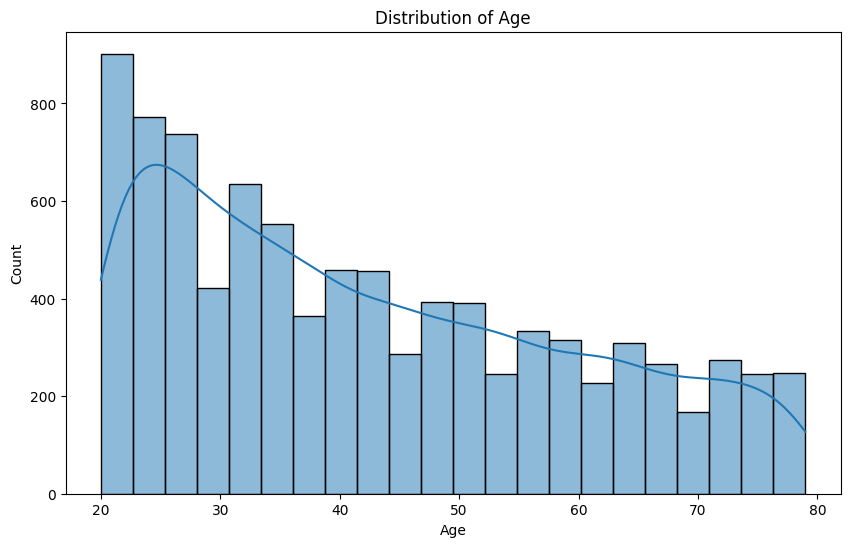

In [10]:
# Age Histogram
plt.figure(figsize=(10,6))
sns.histplot(data=data_train, x='Age', kde=True)
plt.title("Distribution of Age")
plt.show()

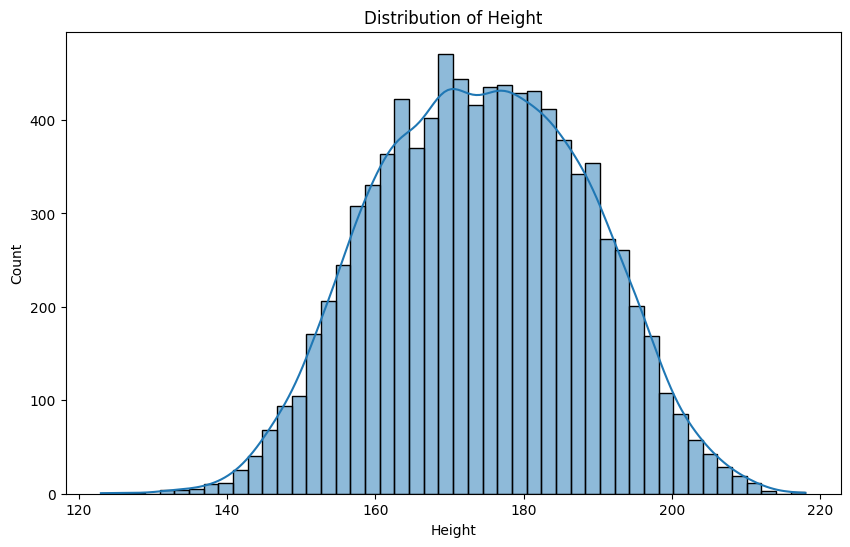

In [11]:
# Height Histogram
plt.figure(figsize=(10,6))
sns.histplot(data=data_train, x='Height', kde=True)
plt.title("Distribution of Height")
plt.show()

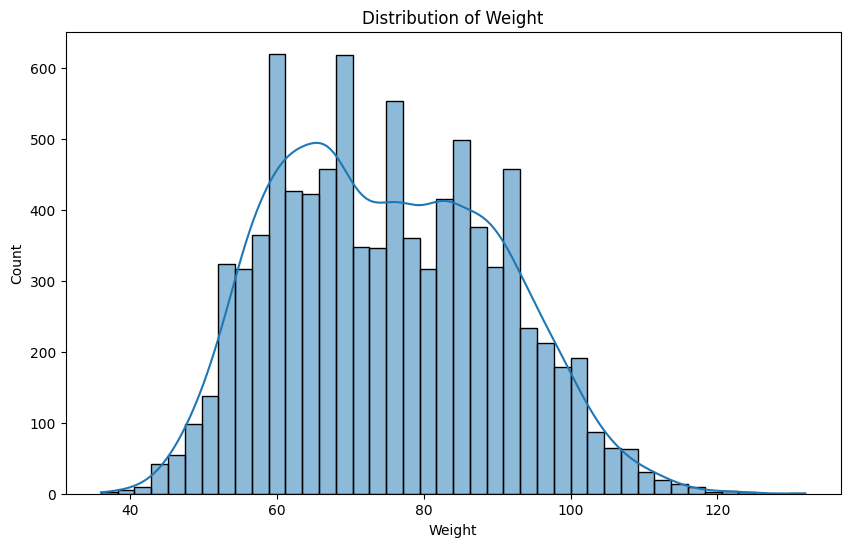

In [12]:
# Weight Histogram
plt.figure(figsize=(10,6))
sns.histplot(data=data_train, x='Weight', kde=True)
plt.title("Distribution of Weight")
plt.show()

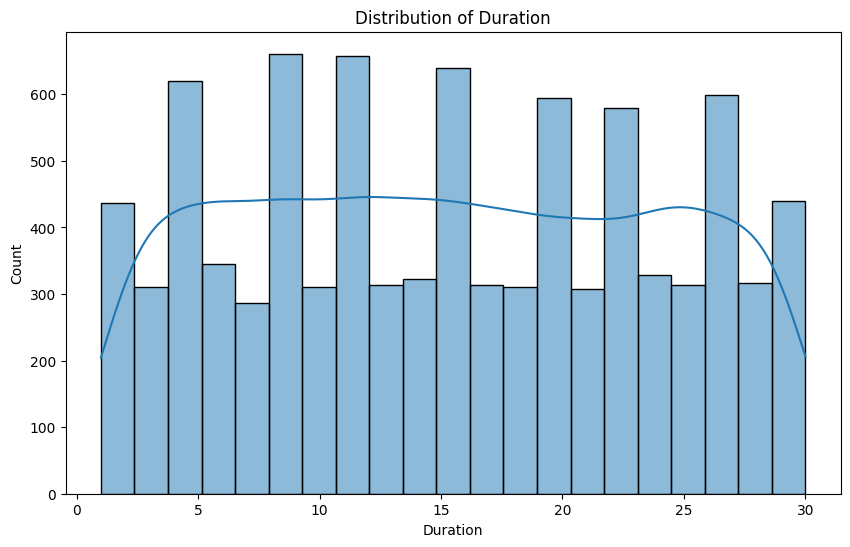

In [13]:
# Duration Histogram
plt.figure(figsize=(10,6))
sns.histplot(data=data_train, x='Duration', kde=True)
plt.title("Distribution of Duration")
plt.show()

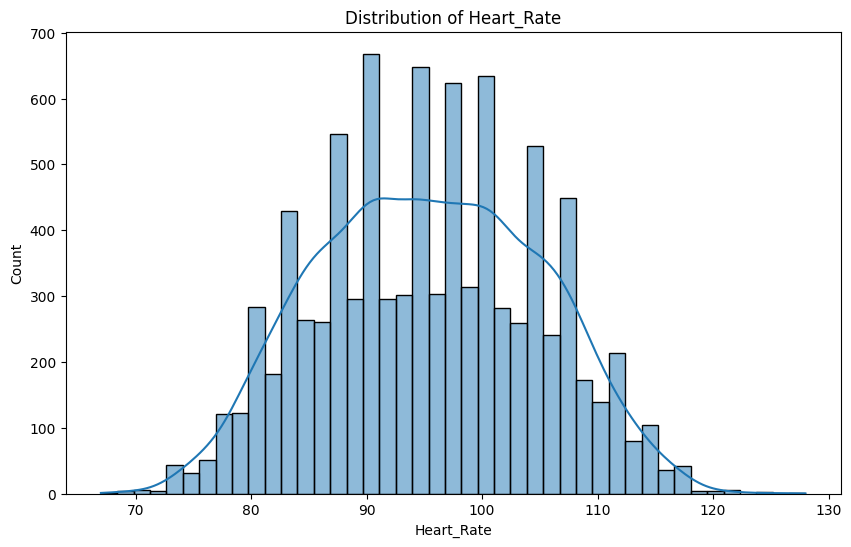

In [14]:
# Heart Rate Histogram
plt.figure(figsize=(10,6))
sns.histplot(data=data_train, x='Heart_Rate', kde=True)
plt.title("Distribution of Heart_Rate")
plt.show()

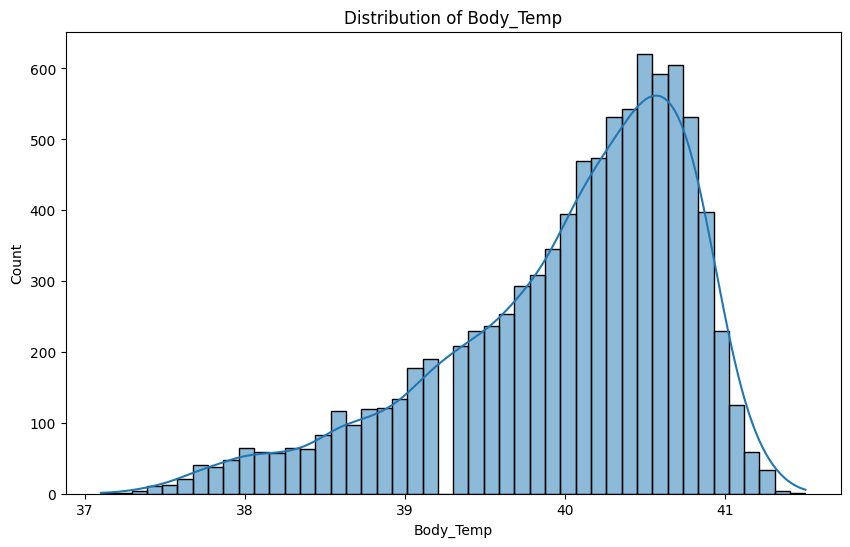

In [15]:
# Body Temp Histogram
plt.figure(figsize=(10,6))
sns.histplot(data=data_train, x='Body_Temp', kde=True)
plt.title("Distribution of Body_Temp")
plt.show()

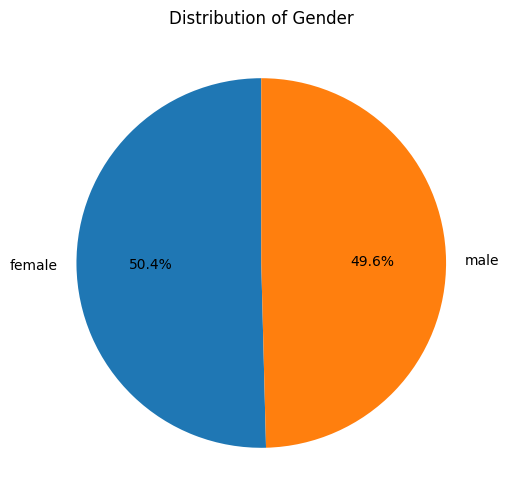

In [16]:
# Gender Piechart
plt.figure(figsize=(10,6))
plt.pie(x=data_train['Gender'].value_counts(), labels=data_train['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Gender")
plt.show()

## Bivariate Analysis

In [17]:
data_train.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,female,46,187.0,82.0,24.0,98.0,40.7,127.0
1,male,21,181.0,85.0,4.0,77.0,39.0,5.0
2,male,53,194.0,97.0,19.0,105.0,40.3,139.0
3,male,61,199.0,114.0,2.0,83.0,38.2,9.0
4,female,31,170.0,67.0,29.0,111.0,41.1,192.0


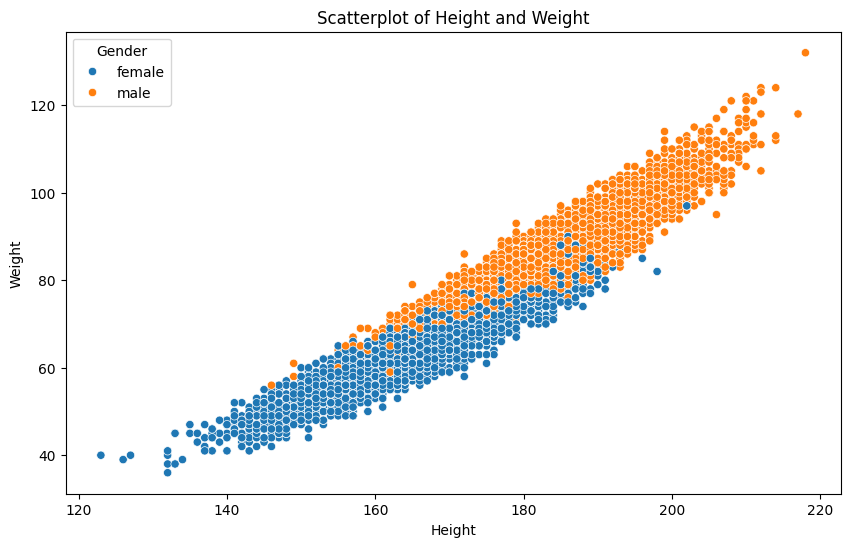

In [18]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=data_train, x='Height', y='Weight', hue='Gender')
plt.title("Scatterplot of Height and Weight")
plt.show()

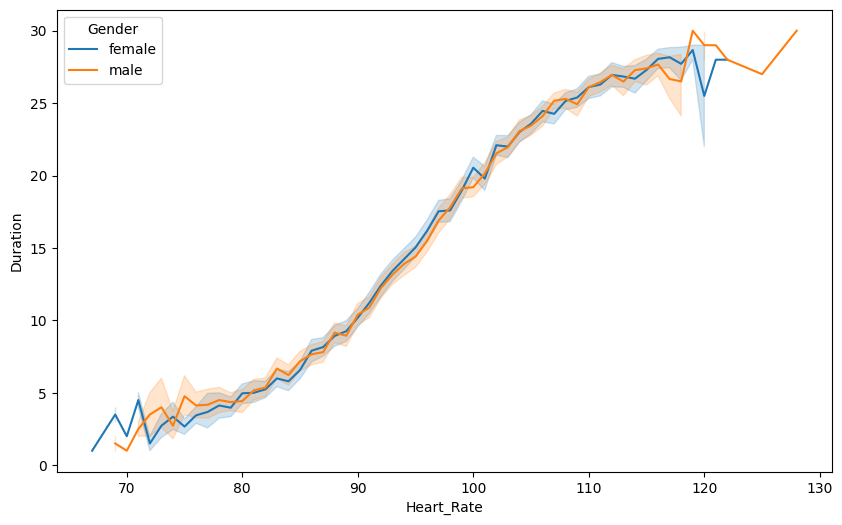

In [19]:

plt.figure(figsize=(10,6))
sns.lineplot(data=data_train, x='Heart_Rate', y='Duration', hue='Gender')
plt.show()

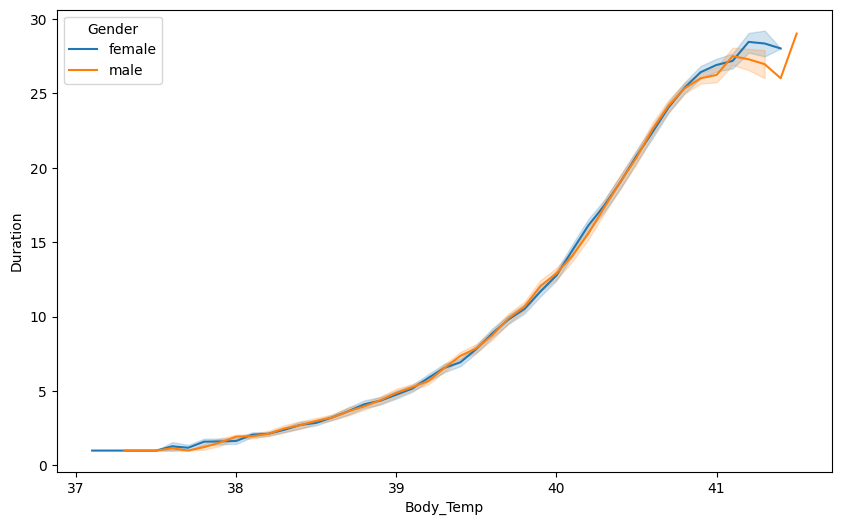

In [20]:

plt.figure(figsize=(10,6))
sns.lineplot(data=data_train, x='Body_Temp', y='Duration', hue='Gender')
plt.show()

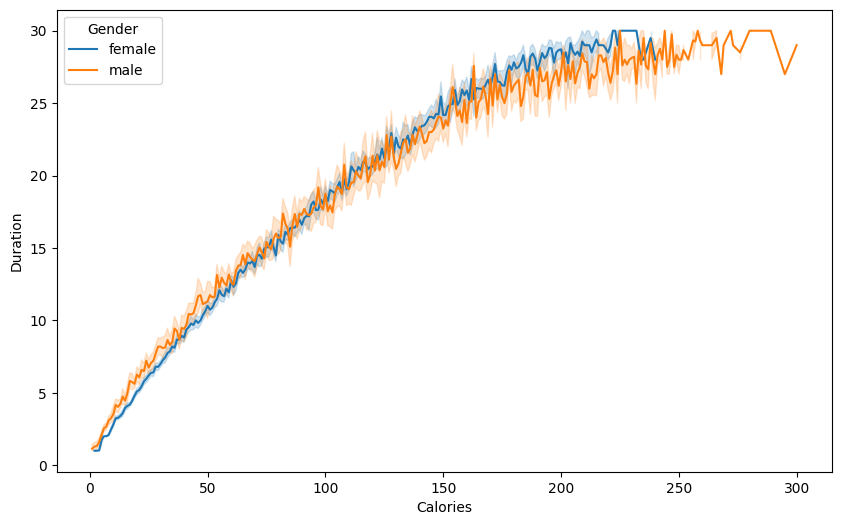

In [21]:

plt.figure(figsize=(10,6))
sns.lineplot(data=data_train, x='Calories', y='Duration', hue='Gender')
plt.show()

## Multivariate Analysis

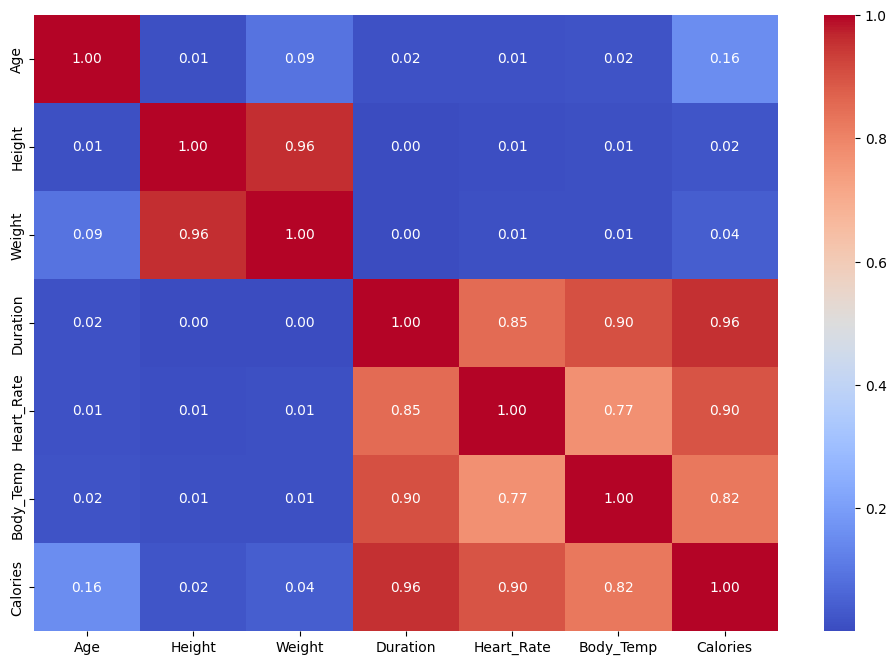

In [22]:

corr_matrix = data_train.select_dtypes(exclude='object').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()


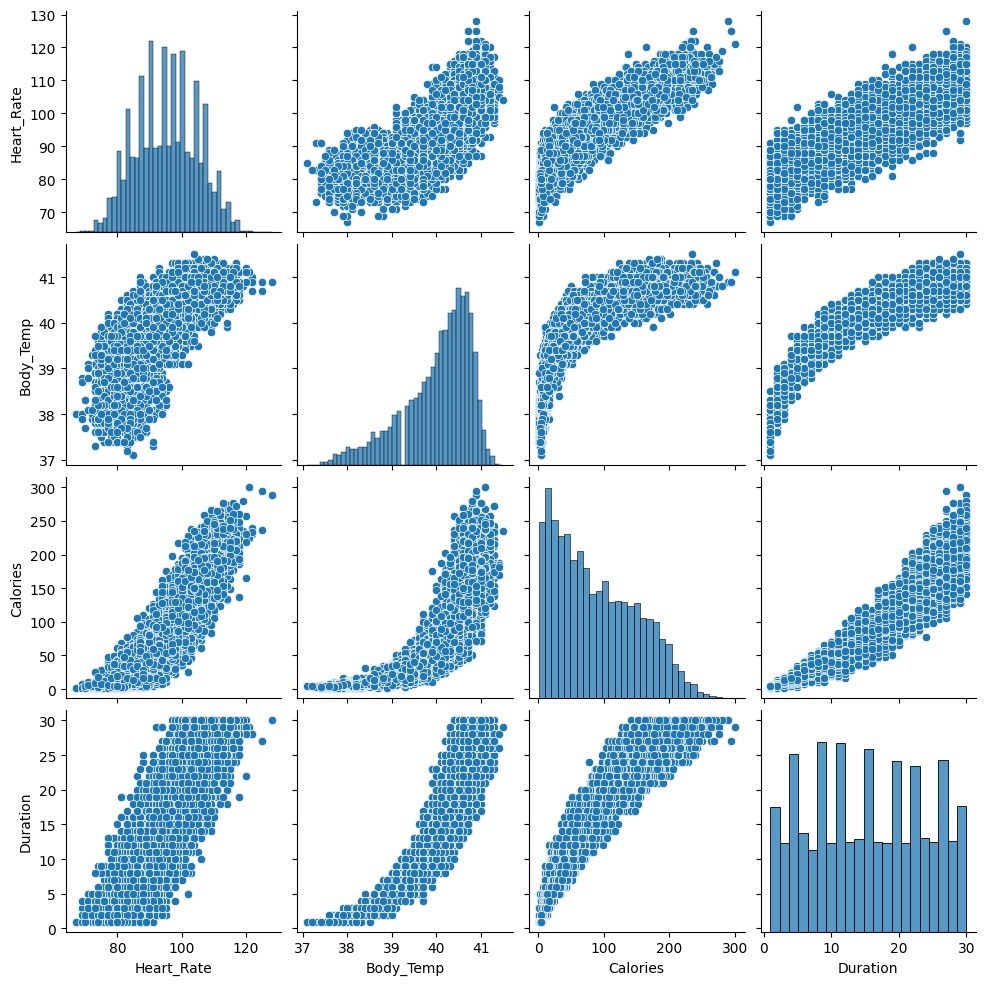

In [23]:
sns.pairplot(data_train[['Heart_Rate', 'Body_Temp', 'Calories', 'Duration']])
plt.show()

## Graph Inference
* Duration of Exercise: Longer exercise sessions result in more calories burned.
* Exercise Intensity: Higher-intensity exercises typically burn more calories per minute than lower-intensity ones.
* Heart Rate: A higher heart rate is associated with increased energy expenditure.
* Body Temperature: Higher body temperatures during exercise indicate more exertion, which often correlates with increased calorie burn.
* Individual Characteristics: Factors like age, weight, gender, and fitness level also impact how many calories an individual burns.

# 4. Data Preparation

<div align="center">
    <img src="https://altair.com/images/default-source/resource-images/da_solutionsflyer_monarchaudit_resourcelibrary_thumbnail_1200x628-jpg.jpg?sfvrsn=7663be6f_0" width="650" height="450"/>
 </div>
 

## Handling Outliers

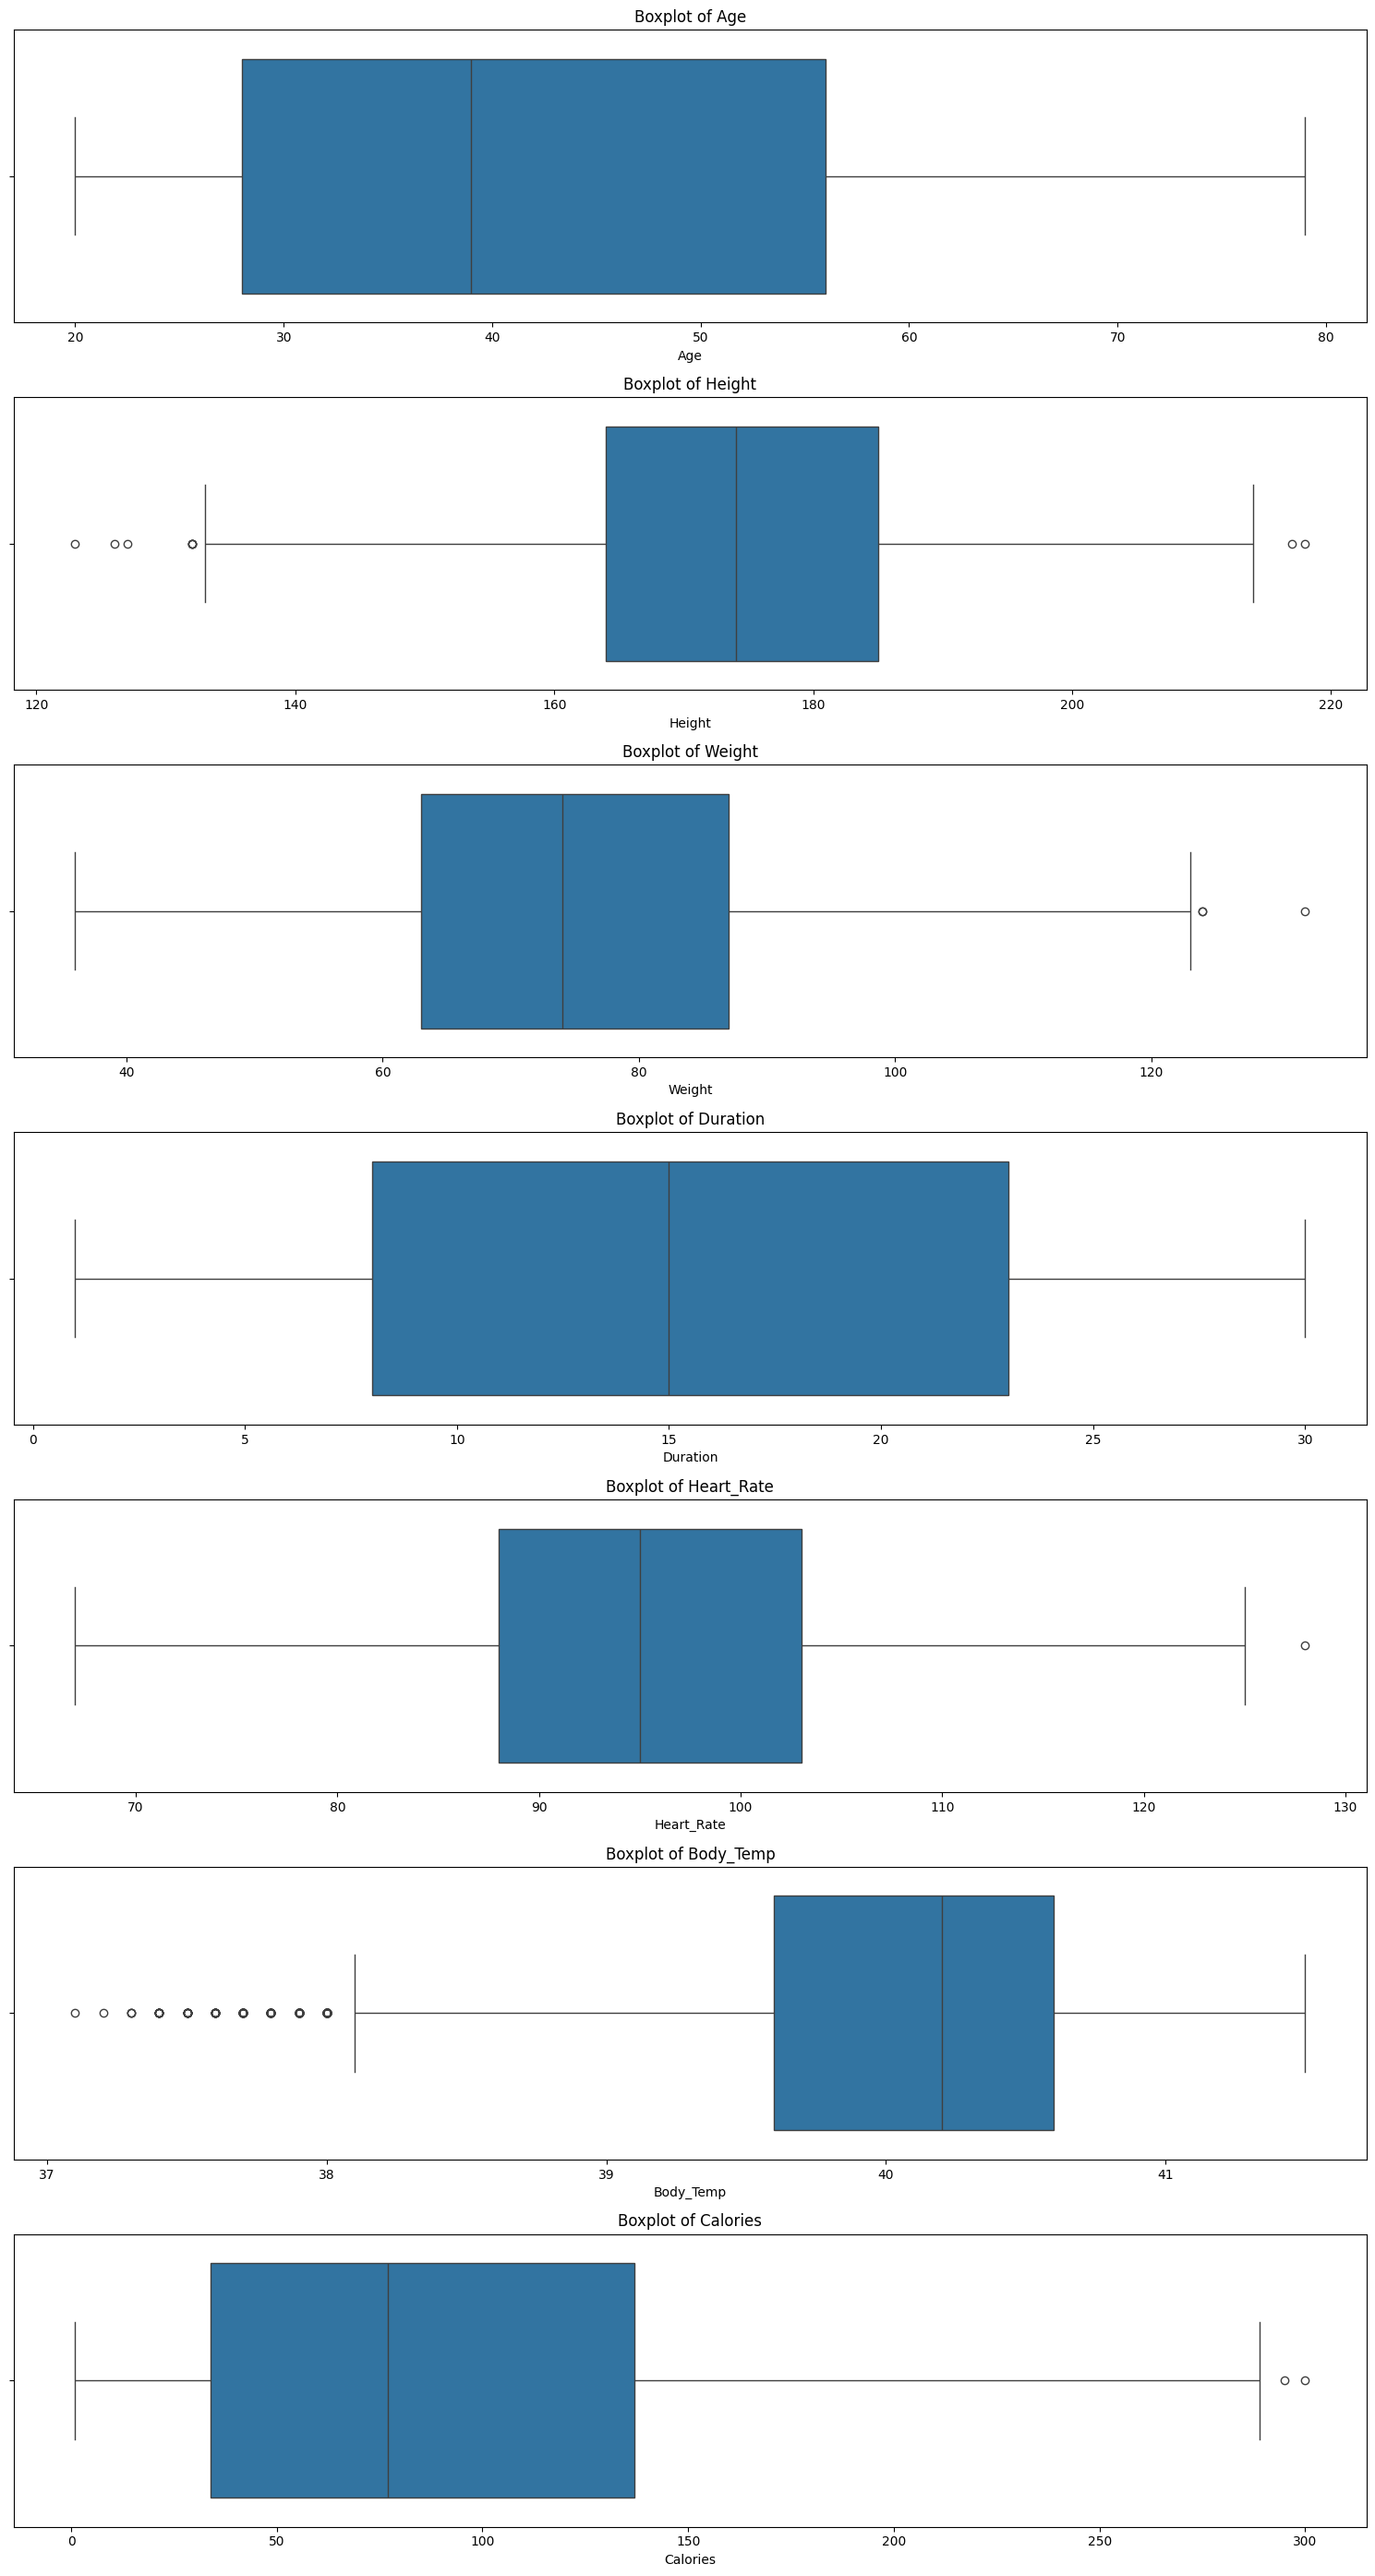

In [24]:
numerical_features = data_train.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, len(numerical_features) * 4))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i) 
    sns.boxplot(data=data_train, x=feature)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [25]:
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

columns_to_handle = ['Height', 'Body_Temp', 'Heart_Rate', 'Weight']

# Apply the outlier handling function to each column in X_train and X_test
for col in columns_to_handle:
    handle_outliers(data_test, col)
    handle_outliers(data_train, col)

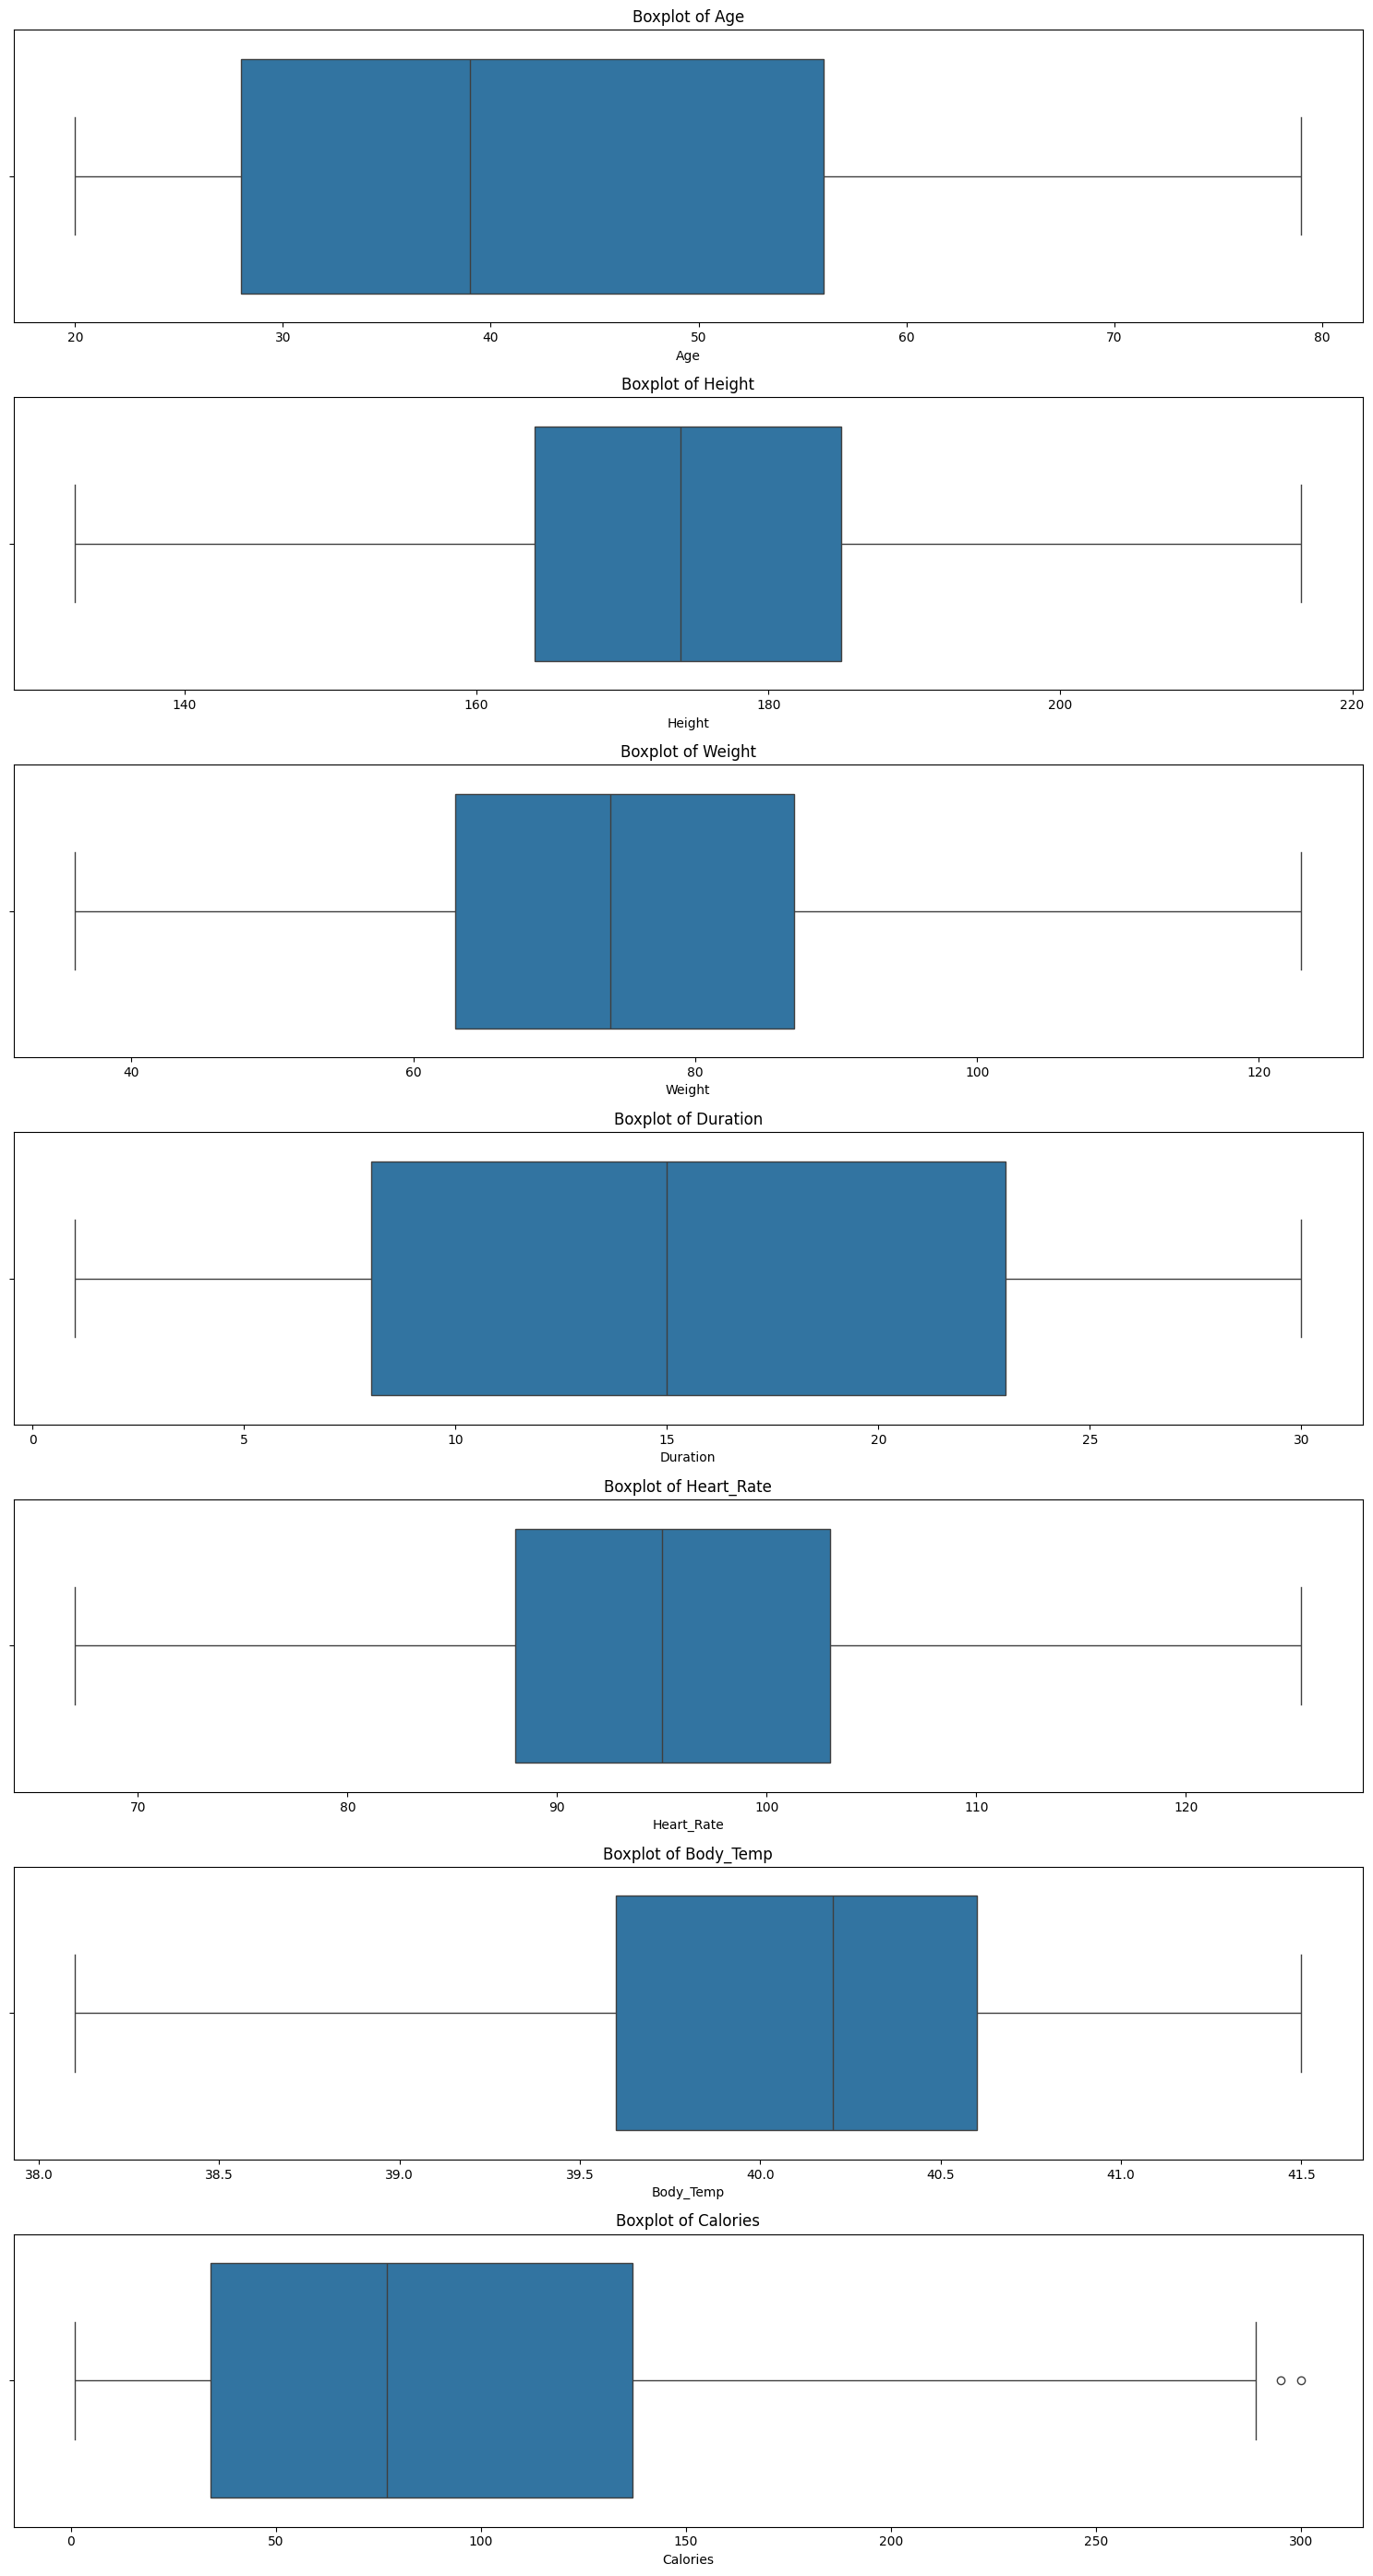

In [26]:
numerical_features = data_train.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, len(numerical_features) * 4))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i) 
    sns.boxplot(data=data_train, x=feature)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [27]:
# data_train['BMI_Index'] = data_train['Weight'] / ((data_train['Height'] / 100) ** 2)
# data_train = data_train.drop(['Height', 'Weight'], axis=1)
# data_test['BMI_Index'] = data_test['Weight'] / ((data_test['Height'] / 100) ** 2)
# data_test = data_test.drop(['Height', 'Weight'], axis=1)

In [28]:
# data_train['HeartBodyRatio'] = data_train['Heart_Rate'] / data_train['Body_Temp']
# data_test['HeartBodyRatio'] = data_test['Heart_Rate'] / data_test['Body_Temp']

In [29]:
# data_train = data_train.drop(['Heart_Rate', 'Body_Temp'],axis=1)
# data_test = data_test.drop(['Heart_Rate', 'Body_Temp'],axis=1)
# data_train.head()

## Encoding Categorical Data

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*ggtP4a5YaRx6l09KQaYOnw.png" width="1000" height="400"/>
 </div>

In [30]:
data_train = pd.get_dummies(data_train, columns=['Gender'], prefix=['Gender'])
data_test = pd.get_dummies(data_test, columns=['Gender'], prefix=['Gender'])

In [31]:
data_train.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,46,187.0,82.0,24.0,98.0,40.7,127.0,True,False
1,21,181.0,85.0,4.0,77.0,39.0,5.0,False,True
2,53,194.0,97.0,19.0,105.0,40.3,139.0,False,True
3,61,199.0,114.0,2.0,83.0,38.2,9.0,False,True
4,31,170.0,67.0,29.0,111.0,41.1,192.0,True,False


In [32]:
data_train = data_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
data_test = data_test.applymap(lambda x: int(x) if isinstance(x, bool) else x)

C:\Users\Yusuf Imantaka\AppData\Local\Temp\ipykernel_4904\2104990837.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_train = data_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
C:\Users\Yusuf Imantaka\AppData\Local\Temp\ipykernel_4904\2104990837.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_test = data_test.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [33]:
data_train.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,46,187.0,82.0,24.0,98.0,40.7,127.0,1,0
1,21,181.0,85.0,4.0,77.0,39.0,5.0,0,1
2,53,194.0,97.0,19.0,105.0,40.3,139.0,0,1
3,61,199.0,114.0,2.0,83.0,38.2,9.0,0,1
4,31,170.0,67.0,29.0,111.0,41.1,192.0,1,0


# 5. Modeling

## Splitting the training data

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:388/1*QSXxOderidihfo1itIE7cw.png" width="550" height="450"/>
 </div>

In [34]:
from sklearn.model_selection import train_test_split
X = data_train.drop(columns=['Calories']) 
y = data_train['Calories']                 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (7200, 8) (7200,)
Testing set shape: (1800, 8) (1800,)


In [35]:
X_train.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
6317,25,162.0,57.0,14.0,93.0,40.1,1,0
740,78,172.0,72.0,1.0,72.0,38.1,1,0
3781,29,175.0,77.0,27.0,106.0,40.9,0,1
7850,40,198.0,104.0,29.0,110.0,40.7,0,1
2963,51,167.0,62.0,3.0,87.0,38.7,1,0


## Testing 3 models: Linear Regression-Random Forest Regessor-XGB Regressor 

<div align="center">
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/jrhgtfredsaa-01-scaled.webp" width="650" height="450"/>
 </div>

In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, eval_metric="rmse")
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the results
    results[name] = {"R2": r2, "MAE": mae, "MSE": mse}

    # Display the scores
    print(f"{name} - R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}\n")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

Linear Regression - R2: 0.9655, MAE: 8.5825, MSE: 142.5357

Random Forest - R2: 0.9960, MAE: 2.3009, MSE: 16.6405

XGBoost - R2: 0.9981, MAE: 1.7074, MSE: 7.6372

                         R2       MAE         MSE
Linear Regression  0.965451  8.582532  142.535693
Random Forest      0.995967  2.300894   16.640469
XGBoost            0.998149  1.707355    7.637197


### Choosing XGBoost model from the evaluation

<div align="center">
    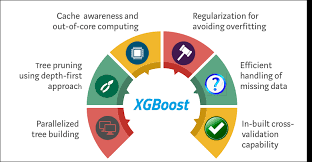
 </div>

In [37]:
xgb_model = XGBRegressor(random_state=42, eval_metric="rmse")
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Final XGBoost Model Performance:")
print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Final XGBoost Model Performance:
R2 Score: 0.9981
Mean Absolute Error (MAE): 1.7074
Mean Squared Error (MSE): 7.6372


# 6. Model Evaluation


## Cross-Validation before Tuning


<div align="center">
    <img src="https://images.prismic.io/turing/6598098d531ac2845a272519_image5_11zon_af97fe4b03.webp?auto=format,compress" width="550" height="450"/>
 </div>

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

cv_mse_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=mse_scorer)
mean_mse = -cv_mse_scores.mean()  # Converting to positive for interpretability
std_mse = cv_mse_scores.std()

cv_mae_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=mae_scorer)
mean_mae = -cv_mae_scores.mean()  # Converting to positive for interpretability
std_mae = cv_mae_scores.std()

cv_r2_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=r2_scorer)
mean_r2 = cv_r2_scores.mean()
std_r2 = cv_r2_scores.std()

print("Cross-Validation Results:")
print("MSE:", -cv_mse_scores)
print(f"Mean MSE: {mean_mse:.4f}, Standard Deviation of MSE: {std_mse:.4f}")
print("MAE:", -cv_mae_scores)
print(f"Mean MAE: {mean_mae:.4f}, Standard Deviation of MAE: {std_mae:.4f}")
print("R2:", cv_r2_scores)
print(f"Mean R2: {mean_r2:.4f}, Standard Deviation of R2: {std_r2:.4f}")

Cross-Validation Results:
MSE: [7.4851684  7.51004221 6.23391936 6.4050942  7.60956923]
Mean MSE: 7.0488, Standard Deviation of MSE: 0.5993
MAE: [1.84825451 1.81229742 1.74205479 1.74845452 1.8688031 ]
Mean MAE: 1.8040, Standard Deviation of MAE: 0.0513
R2: [0.99798079 0.99811512 0.99833683 0.99832214 0.99801243]
Mean R2: 0.9982, Standard Deviation of R2: 0.0002


## Apply Hyperparameter Tuning with Optuna

<div align="center">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUa1ngf1JLS5hQl1NwgELP4-PnMYFnX5dd3A&s" width="450" height="450"/>
 </div>

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameters and their ranges
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-8, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-8, 1.0)
    }

    # Create the model with the suggested parameters
    model = XGBRegressor(random_state=42, eval_metric="rmse", **params)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_test)
    
    # Calculate the RMSE as the objective to minimize
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

# Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best parameters:", best_params)

# Train the final model with the best parameters
xgb_model = XGBRegressor(random_state=42, eval_metric="rmse", **best_params)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluate the final model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Final XGBoost Model Performance with Hyperparameter Tuning:")
print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


[I 2024-11-04 00:46:17,543] A new study created in memory with name: no-name-9cad7bb6-24a4-4812-8631-806921a0a383
C:\Users\Yusuf Imantaka\AppData\Local\Temp\ipykernel_4904\818350198.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
C:\Users\Yusuf Imantaka\AppData\Local\Temp\ipykernel_4904\818350198.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
C:\Users\Yusuf Imantaka\AppData\Local\Temp\ipykernel_4904\818350198.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/opt

## Cross-Validation After Tuning

<div align="center">
    <img src="https://images.prismic.io/turing/6598098d531ac2845a272519_image5_11zon_af97fe4b03.webp?auto=format,compress" width="550" height="450"/>
 </div>


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Cross-validate on the training set
cv_mse_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=mse_scorer)
mean_mse = -cv_mse_scores.mean()  # Converting to positive for interpretability
std_mse = cv_mse_scores.std()

cv_mae_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=mae_scorer)
mean_mae = -cv_mae_scores.mean()  # Converting to positive for interpretability
std_mae = cv_mae_scores.std()

cv_r2_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=r2_scorer)
mean_r2 = cv_r2_scores.mean()
std_r2 = cv_r2_scores.std()

print("Cross-Validation Results (Training Data):")
print("MSE:", -cv_mse_scores)
print(f"Mean MSE: {mean_mse:.4f}, Standard Deviation of MSE: {std_mse:.4f}")
print("MAE:", -cv_mae_scores)
print(f"Mean MAE: {mean_mae:.4f}, Standard Deviation of MAE: {std_mae:.4f}")
print("R2:", cv_r2_scores)
print(f"Mean R2: {mean_r2:.4f}, Standard Deviation of R2: {std_r2:.4f}")

# Evaluate on the testing set
y_test_pred = xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTesting Set Performance:")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Testing MAE: {test_mae:.4f}")
print(f"Testing R2: {test_r2:.4f}")

# Overfitting/Underfitting Detection
print("\nOverfitting/Underfitting Detection:")
if mean_mse < test_mse and mean_r2 > test_r2:
    print("The model may be overfitting: Cross-validation scores are better than testing scores.")
elif mean_mse > test_mse and mean_r2 < test_r2:
    print("The model may be underfitting: Both cross-validation and testing scores are low.")
else:
    print("The model shows balanced performance: Cross-validation and testing scores are similar.")

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
# mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
# r2_scorer = make_scorer(r2_score)

# cv_mse_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=mse_scorer)
# mean_mse = -cv_mse_scores.mean()  # Converting to positive for interpretability
# std_mse = cv_mse_scores.std()

# cv_mae_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=mae_scorer)
# mean_mae = -cv_mae_scores.mean()  # Converting to positive for interpretability
# std_mae = cv_mae_scores.std()

# cv_r2_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=r2_scorer)
# mean_r2 = cv_r2_scores.mean()
# std_r2 = cv_r2_scores.std()

# print("Cross-Validation Results:")
# print("MSE:", -cv_mse_scores)
# print(f"Mean MSE: {mean_mse:.4f}, Standard Deviation of MSE: {std_mse:.4f}")
# print("MAE:", -cv_mae_scores)
# print(f"Mean MAE: {mean_mae:.4f}, Standard Deviation of MAE: {std_mae:.4f}")
# print("R2:", cv_r2_scores)
# print(f"Mean R2: {mean_r2:.4f}, Standard Deviation of R2: {std_r2:.4f}")

## Predicted vs. Actual Values

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()


# 7. Submission

In [ ]:
data_test.head()

In [ ]:
user_id = data_test.User_ID

In [ ]:
data_test = data_test.drop(['User_ID'], axis=1)

In [ ]:
data_test.head()

In [ ]:
data_test_pred = xgb_model.predict(data_test)

In [ ]:
data_test_pred

In [ ]:
submission_df = pd.DataFrame({
    'User_ID': user_id,
    'Calories': data_test_pred
})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")